# Gender Recognition

The project "Age and gender recognition in speech processing project" has been divided into two parts: Age recognition and Gender recognition. For Gender recognition, the dataset from Kaggle is being used. The link of the dataset: https://www.kaggle.com/datasets/primaryobjects/voicegender 

In [44]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # IMPORTING CLASS FOR SPLITTING
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score,auc
import seaborn as sns

In [45]:
# reading the dataframe
dataframe = pd.read_csv('voice.csv')

In [46]:
# Checking first 10 rows in the dataframe
dataframe.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,...,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,...,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,...,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,...,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,...,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [47]:
# To check the distribution of male and female across all the attributes
dataframe.groupby("label").count()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
label,,,,,,,,,,,,,,,,,,,,
female,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584
male,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584,1584


In [48]:
# Accessing the number of rows and columns in the dataframe
dataframe.shape

(3168, 21)

The project is a classification problem. Hence, we are going to use Machine Learning models like Decision Tree, Random Forest, Support Vector Machine, Naive Bayes 

In [49]:
# Printing different columns
print(dataframe.columns)

Index(['meanfreq', 'sd', 'median', 'Q25', 'Q75', 'IQR', 'skew', 'kurt',
       'sp.ent', 'sfm', 'mode', 'centroid', 'meanfun', 'minfun', 'maxfun',
       'meandom', 'mindom', 'maxdom', 'dfrange', 'modindx', 'label'],
      dtype='object')


In [50]:
# Checking if there are any null or missing values
dataframe.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [51]:
# Getting information about the data types of the features 
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [52]:
# Getting insights on the data, especially the label column as we have to 
# identify the gender
dataframe['label'].nunique()

2

In [53]:
insight1 = dataframe['label'].value_counts()
print(insight1)
print("Count total ", dataframe['label'].count())

male      1584
female    1584
Name: label, dtype: int64
Count total  3168


In [54]:
# Correlation between different input variables
dataframe.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,0.687715,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,-0.529150,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,0.677433,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,0.591277,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,0.486857,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,-0.403764,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,-0.434859,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,-0.406722,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,-0.325298,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,-0.485913,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477


In [55]:
dataframe['label'] =dataframe['label'].astype('category').cat.codes

In [56]:
dataframe['label']

0       1
1       1
2       1
3       1
4       1
       ..
3163    0
3164    0
3165    0
3166    0
3167    0
Name: label, Length: 3168, dtype: int8

In [57]:
# Here male has been labeled 1 and female has been labeled 0
dataframe

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,1
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,1
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,1
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,1
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,...,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,0
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,...,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,0
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,...,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,0
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,...,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,0


In [58]:
dataframe.corr()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
meanfreq,1.000000,-0.739039,0.925445,0.911416,0.740997,-0.627605,-0.322327,-0.316036,-0.601203,-0.784332,...,1.000000,0.460844,0.383937,0.274004,0.536666,0.229261,0.519528,0.515570,-0.216979,-0.337415
sd,-0.739039,1.000000,-0.562603,-0.846931,-0.161076,0.874660,0.314597,0.346241,0.716620,0.838086,...,-0.739039,-0.466281,-0.345609,-0.129662,-0.482726,-0.357667,-0.482278,-0.475999,0.122660,0.479539
median,0.925445,-0.562603,1.000000,0.774922,0.731849,-0.477352,-0.257407,-0.243382,-0.502005,-0.661690,...,0.925445,0.414909,0.337602,0.251328,0.455943,0.191169,0.438919,0.435621,-0.213298,-0.283919
Q25,0.911416,-0.846931,0.774922,1.000000,0.477140,-0.874189,-0.319475,-0.350182,-0.648126,-0.766875,...,0.911416,0.545035,0.320994,0.199841,0.467403,0.302255,0.459683,0.454394,-0.141377,-0.511455
Q75,0.740997,-0.161076,0.731849,0.477140,1.000000,0.009636,-0.206339,-0.148881,-0.174905,-0.378198,...,0.740997,0.155091,0.258002,0.285584,0.359181,-0.023750,0.335114,0.335648,-0.216475,0.066906
IQR,-0.627605,0.874660,-0.477352,-0.874189,0.009636,1.000000,0.249497,0.316185,0.640813,0.663601,...,-0.627605,-0.534462,-0.222680,-0.069588,-0.333362,-0.357037,-0.337877,-0.331563,0.041252,0.618916
skew,-0.322327,0.314597,-0.257407,-0.319475,-0.206339,0.249497,1.000000,0.977020,-0.195459,0.079694,...,-0.322327,-0.167668,-0.216954,-0.080861,-0.336848,-0.061608,-0.305651,-0.304640,-0.169325,0.036627
kurt,-0.316036,0.346241,-0.243382,-0.350182,-0.148881,0.316185,0.977020,1.000000,-0.127644,0.109884,...,-0.316036,-0.194560,-0.203201,-0.045667,-0.303234,-0.103313,-0.274500,-0.272729,-0.205539,0.087195
sp.ent,-0.601203,0.716620,-0.502005,-0.648126,-0.174905,0.640813,-0.195459,-0.127644,1.000000,0.866411,...,-0.601203,-0.513194,-0.305826,-0.120738,-0.293562,-0.294869,-0.324253,-0.319054,0.198074,0.490552
sfm,-0.784332,0.838086,-0.661690,-0.766875,-0.378198,0.663601,0.079694,0.109884,0.866411,1.000000,...,-0.784332,-0.421066,-0.362100,-0.192369,-0.428442,-0.289593,-0.436649,-0.431580,0.211477,0.357499


<AxesSubplot:>

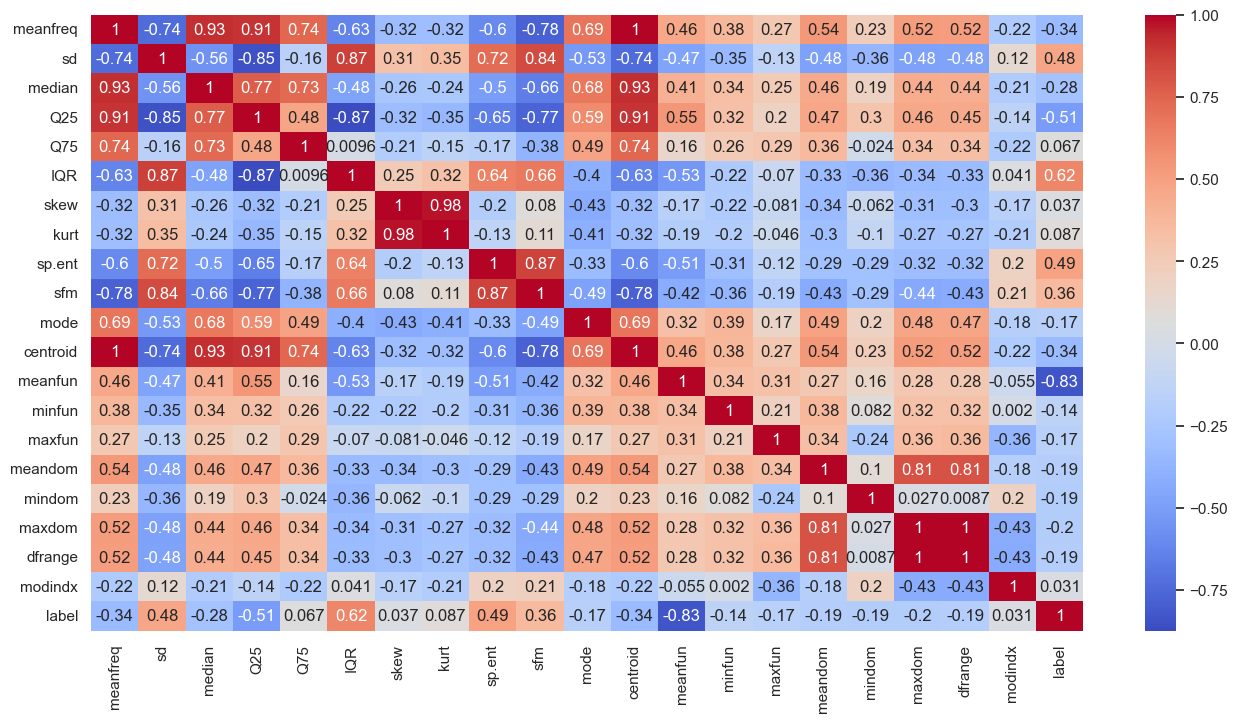

In [59]:
# Reference: https://androidkt.com/find-correlation-between-features-and-target-using-the-correlation-matrix/
sns.set(rc = {'figure.figsize':(16,8)})
sns.heatmap(dataframe.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

In [60]:
# Dataset is being split into training and test set
Y_feature = dataframe['label'].values
X_feature = dataframe.drop(['label'], axis = 'columns')
X_train, X_test, Y_train, Y_test = train_test_split(X_feature,Y_feature,test_size = 0.3, random_state = 42)
name_algorithm = []
score_algorithm = []

In [61]:
X_train.shape

(2217, 20)

In [62]:
X_test.shape

(951, 20)

In [63]:
X_train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
1135,0.199041,0.066605,0.213871,0.138954,0.264096,0.125142,2.268400,8.078101,0.888908,0.399076,0.277489,0.199041,0.146308,0.047761,0.279070,1.079654,0.023438,9.679688,9.656250,0.102000
2912,0.212120,0.042586,0.210479,0.187466,0.243562,0.056096,2.132102,8.132412,0.868537,0.272685,0.185068,0.212120,0.157740,0.047904,0.279070,1.328506,0.023438,7.242188,7.218750,0.167427
179,0.134106,0.064399,0.109854,0.086180,0.181727,0.095547,2.874535,13.648456,0.933989,0.572281,0.085669,0.134106,0.093560,0.015733,0.271186,0.239583,0.007812,3.382812,3.375000,0.093533
834,0.178873,0.058085,0.188707,0.130055,0.212168,0.082113,1.867983,6.998662,0.908829,0.406653,0.192277,0.178873,0.116110,0.047105,0.275862,0.458460,0.023438,2.203125,2.179688,0.107527
842,0.174892,0.055032,0.183887,0.119373,0.207147,0.087774,2.040028,7.880566,0.905661,0.351681,0.201442,0.174892,0.112162,0.046921,0.277457,1.005632,0.023438,7.031250,7.007812,0.087485


In [64]:
X_train.tail()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
3092,0.166738,0.052677,0.169427,0.162650,0.189223,0.026573,7.550412,76.134526,0.865282,0.427317,0.167465,0.166738,0.152651,0.022727,0.208333,0.174154,0.161133,0.214844,0.053711,0.136364
1095,0.198718,0.058959,0.217333,0.143111,0.252000,0.108889,1.116666,3.569725,0.917123,0.363369,0.227556,0.198718,0.139322,0.050473,0.279070,0.792092,0.023438,4.968750,4.945312,0.155766
1130,0.202333,0.063001,0.221946,0.137544,0.264817,0.127273,2.000371,6.681799,0.873847,0.261759,0.272855,0.202333,0.123610,0.047291,0.269663,1.190168,0.023438,7.429688,7.406250,0.093438
1294,0.181799,0.058102,0.192037,0.123670,0.225568,0.101897,1.091660,4.009295,0.925575,0.427947,0.190731,0.181799,0.110586,0.049741,0.274286,0.789062,0.023438,4.359375,4.335938,0.062312
860,0.167732,0.066225,0.171886,0.112598,0.225196,0.112598,0.822981,3.103282,0.953210,0.634648,0.173381,0.167732,0.126107,0.048096,0.279070,0.813616,0.023438,6.023438,6.000000,0.123384


## Using Machine Learning models for classification problems

## SVM

In [65]:
svm = SVC(random_state = 42)
svm.fit(X_train, Y_train)
print("SVM Classification Score is: ",svm.score(X_test, Y_test))
name_algorithm.append("SVM")
score_algorithm.append(svm.score(X_test, Y_test))
pred3 = svm.predict(X_test)

SVM Classification Score is:  0.6624605678233438


## Random Forest

In [66]:
random_forest = RandomForestClassifier(random_state = 42)
random_forest.fit(X_train, Y_train)
print("Random Forest Classification Score ", random_forest.score(X_test, Y_test))
name_algorithm.append("Random Forest")
score_algorithm.append(random_forest.score(X_test, Y_test))
pred2 = random_forest.predict(X_test)

Random Forest Classification Score  0.982124079915878


## Naive Bayes

In [67]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_test, Y_test)
print("Naive Bayes Classification Score: ", naive_bayes.score(X_test, Y_test))
name_algorithm.append("Naive Bayes")
score_algorithm.append(naive_bayes.score(X_test, Y_test))
pred4 = naive_bayes.predict(X_test)

Naive Bayes Classification Score:  0.8706624605678234


## Decision Tree


In [68]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, Y_train)
print("Decision Tree Classification Score: ",decision_tree.score(X_test, Y_test))
name_algorithm.append("Decision Tree")
score_algorithm.append(decision_tree.score(X_test, Y_test))
# Values predicted
pred1 = decision_tree.predict(X_test) 

Decision Tree Classification Score:  0.9621451104100947


## Comparison of Classification Score of Different Algorithms Using Bar Graph

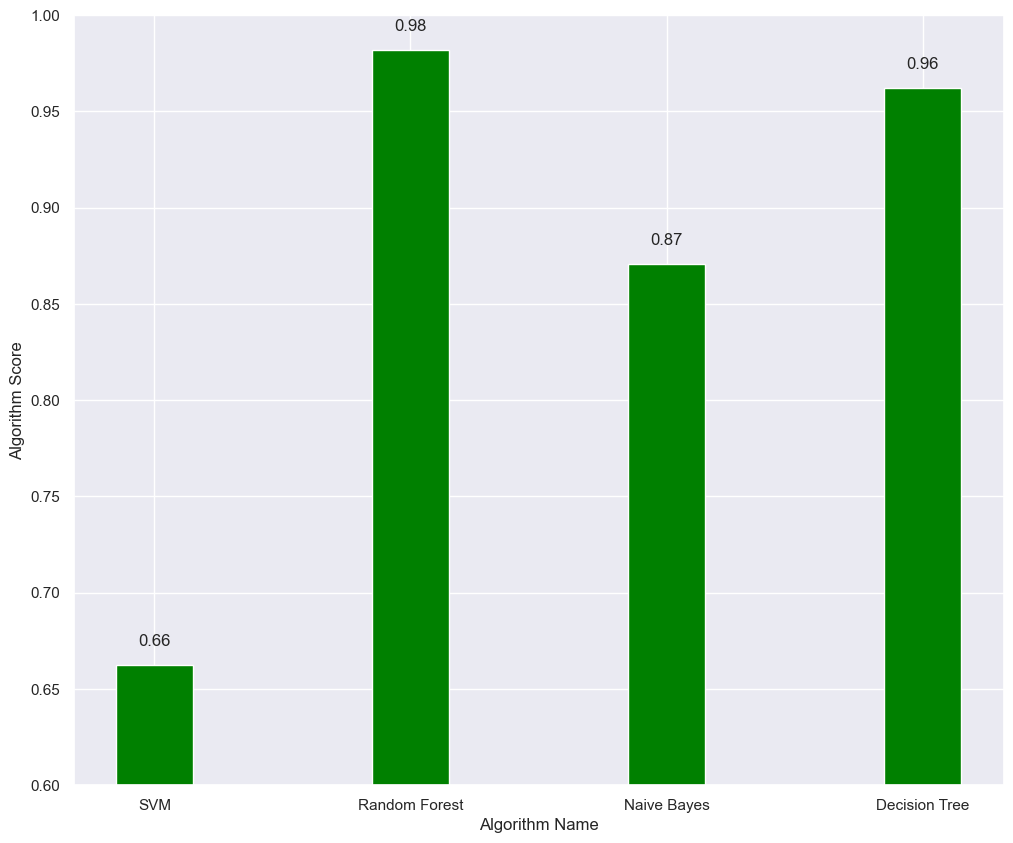

In [70]:
plt.figure(figsize=(12,10))
plt.ylim([0.60,1])
plt.bar(name_algorithm,score_algorithm, width = 0.3, color = ['green'])
plt.xlabel('Algorithm Name')
plt.ylabel('Algorithm Score')

# Looping through each bar and add the score value as text on top of it
# Reference: https://stackoverflow.com/questions/53066633/how-to-show-values-on-top-of-bar-plot
for i, score in enumerate(score_algorithm):
    plt.text(i, score + 0.01, round(score, 2), ha='center')


## Classification Report of different Machine Learning Models using Sklearn.metrics library and classification report function

### SVM Classification Report

In [71]:
svm_report = classification_report(Y_test, pred3)
print(svm_report)

              precision    recall  f1-score   support

           0       0.67      0.58      0.62       452
           1       0.66      0.74      0.70       499

    accuracy                           0.66       951
   macro avg       0.66      0.66      0.66       951
weighted avg       0.66      0.66      0.66       951



### Random Forest Classification Report

In [72]:
random_forest_report = classification_report(Y_test, pred2)
print(random_forest_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       452
           1       0.99      0.98      0.98       499

    accuracy                           0.98       951
   macro avg       0.98      0.98      0.98       951
weighted avg       0.98      0.98      0.98       951



### Naive Bayes Classification Report

In [73]:
naive_bayes_report = classification_report(Y_test,pred4)
print(naive_bayes_report)

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       452
           1       0.88      0.87      0.88       499

    accuracy                           0.87       951
   macro avg       0.87      0.87      0.87       951
weighted avg       0.87      0.87      0.87       951



### Decision Tree Classification Report

In [74]:
decision_tree_report = classification_report(Y_test, pred1)
print(decision_tree_report)

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       452
           1       0.98      0.95      0.96       499

    accuracy                           0.96       951
   macro avg       0.96      0.96      0.96       951
weighted avg       0.96      0.96      0.96       951



## Plotting Pie Charts for the correct and the wrong predictions for every model

### Decision Tree - Pie chart of Predictions

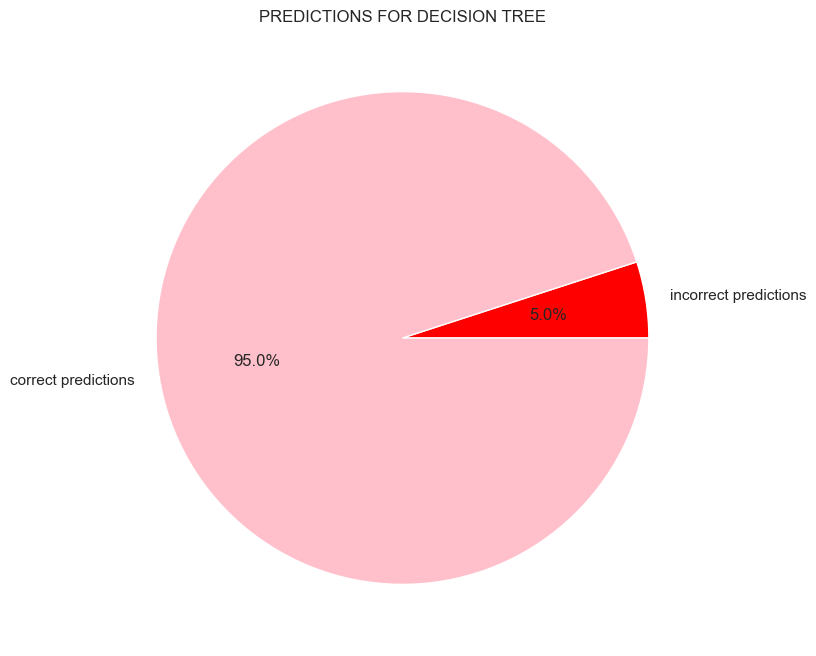

In [75]:
y1 = [31.7,602.3]
label1 = ['incorrect predictions','correct predictions']
plt.pie(y1, labels = label1, autopct='%0.1f%%',colors=['red','pink'])
plt.title('PREDICTIONS FOR DECISION TREE')
plt.show()

We can see from the above chart that 5% of the predictions are incorrect while 95% of the predictions are incorrect

### Random Forest - Pie chart of Predictions

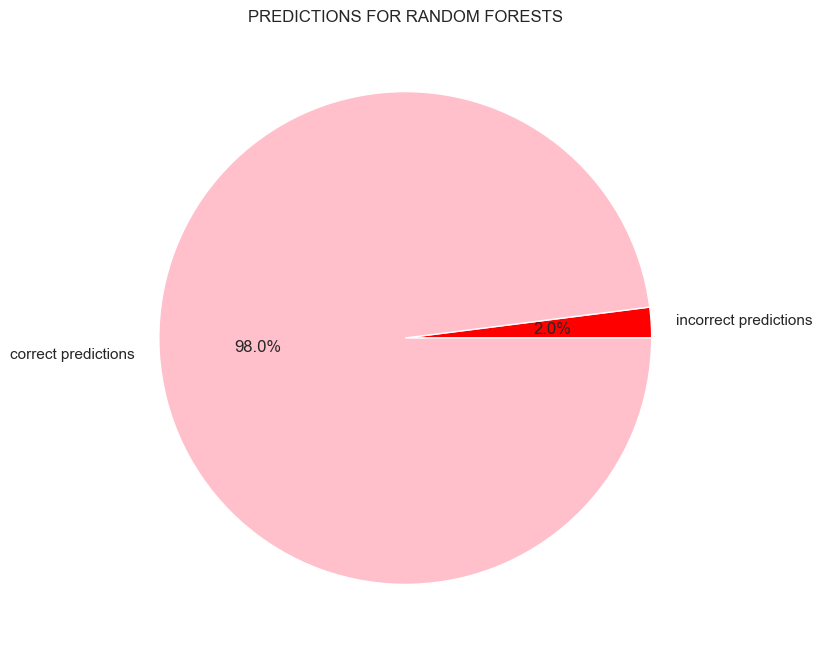

In [76]:
y2 = [12.7,621.3]
label2 = ['incorrect predictions','correct predictions']
plt.pie(y2,labels = label2, autopct = '%0.1f%%', colors=['red','pink'])
plt.title('PREDICTIONS FOR RANDOM FORESTS')
plt.show()

### SVM - Pie chart of Predictions

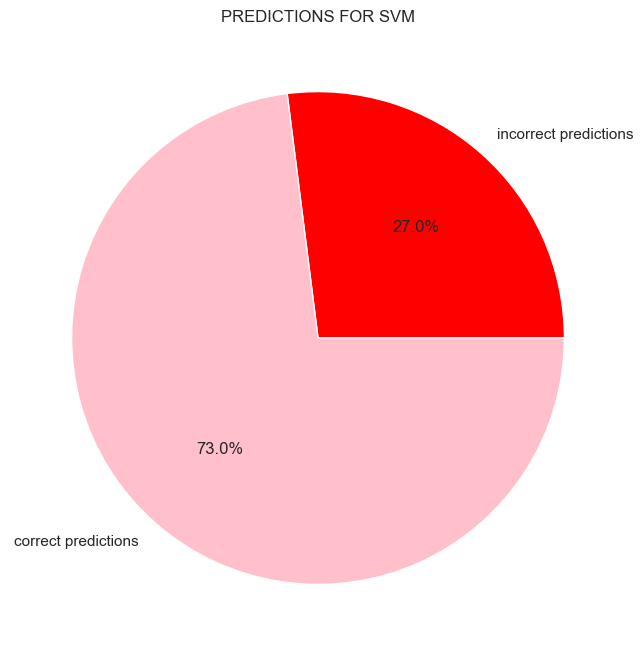

In [77]:
y3 = [171.18,462.82]
label3 = ['incorrect predictions','correct predictions']
plt.pie(y3,labels=label3,autopct='%0.1f%%',colors=['red','pink'])
plt.title('PREDICTIONS FOR SVM')
plt.show()

### Naive Bayes - Pie chart of Predictions

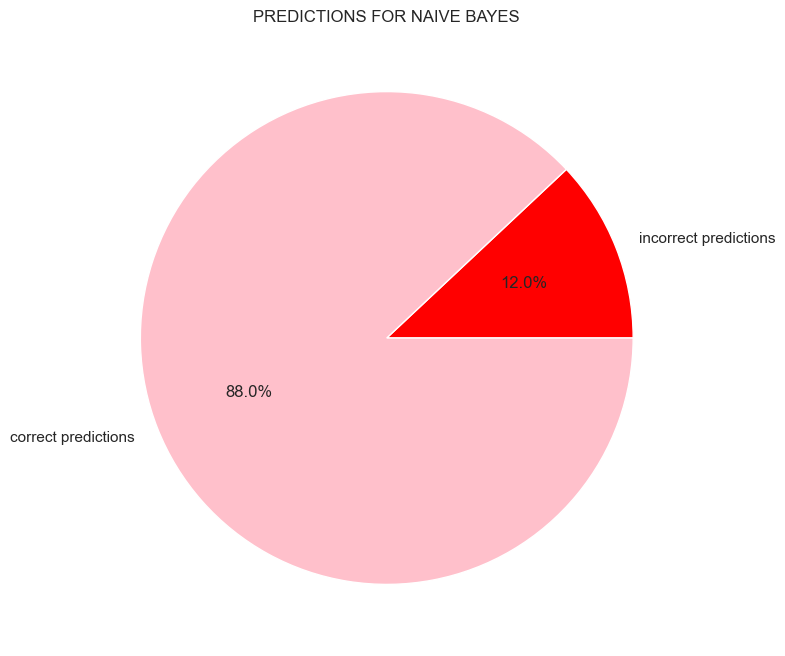

In [78]:
y4 = [76.08, 557.92]
label4 = ['incorrect predictions', 'correct predictions']
plt.pie(y4, labels= label4, autopct='%0.1f%%', colors=['red','pink'])
plt.title('PREDICTIONS FOR NAIVE BAYES')
plt.show()

## Confusion Matrix Plot using Sklearn and Seaborn library

### Confusion Matrix for Decision Tree

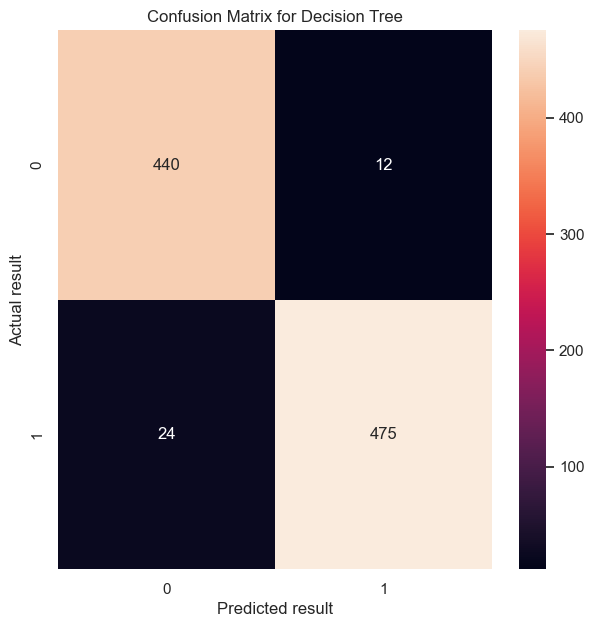

In [88]:
confusion_matrix1 = confusion_matrix(Y_test,pred1)
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix1, annot=True, fmt=".0f")
plt.ylabel("Actual result")
plt.xlabel("Predicted result")
plt.title("Confusion Matrix for Decision Tree")
plt.show()

### Confusion Matrix for Random Forest

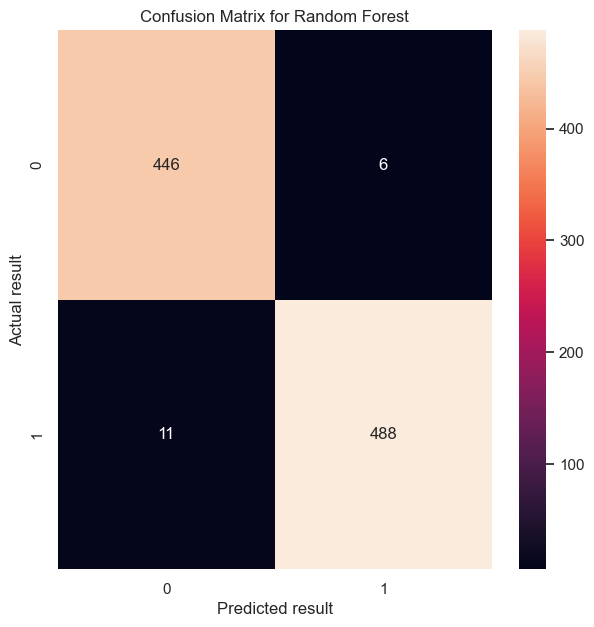

In [89]:
confusion_matrix2 = confusion_matrix(Y_test,pred2)
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix2,annot=True,fmt=".0f")
plt.ylabel("Actual result")
plt.xlabel("Predicted result")
plt.title("Confusion Matrix for Random Forest")
plt.show()

### Confusion Matrix for SVM

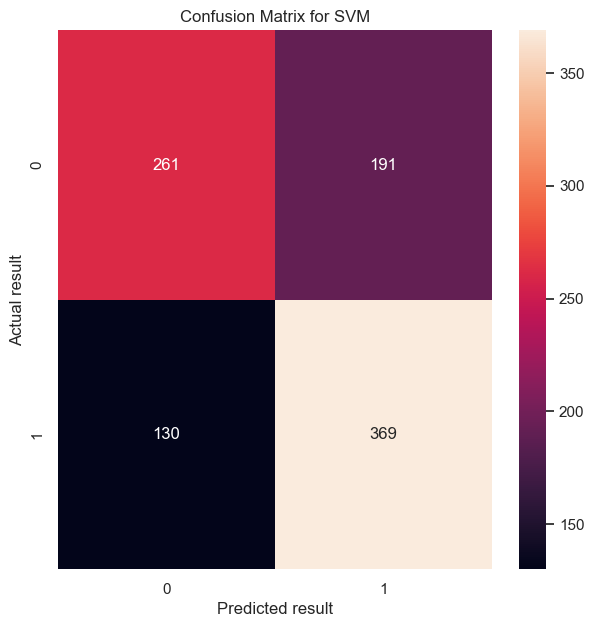

In [90]:
confusion_matrix3 = confusion_matrix(Y_test,pred3)
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix3,annot=True,fmt=".0f")
plt.ylabel("Actual result")
plt.xlabel("Predicted result")
plt.title("Confusion Matrix for SVM")
plt.show()

### Confusion Matrix for Naive Bayes

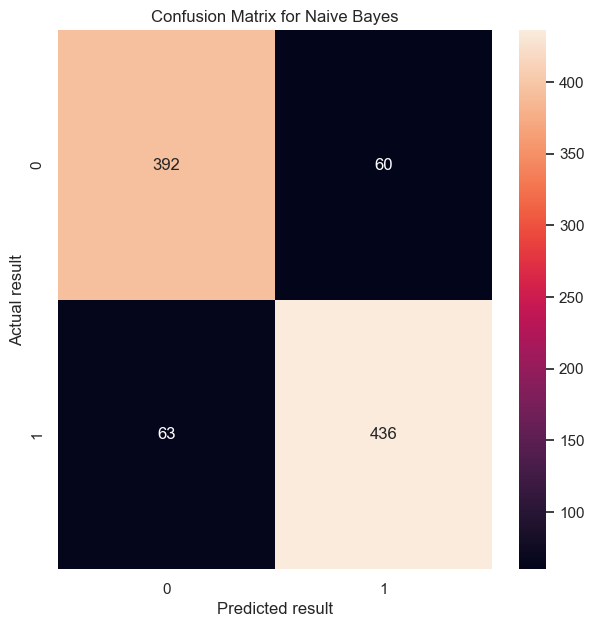

In [91]:
confusion_matrix4 = confusion_matrix(Y_test,pred4)
plt.figure(figsize=(7,7))
sns.heatmap(confusion_matrix4,annot=True,fmt=".0f")
plt.ylabel("Actual result")
plt.xlabel("Predicted result")
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

## ROC Curve for different classification ML models

### ROC Curve - Decision Tree

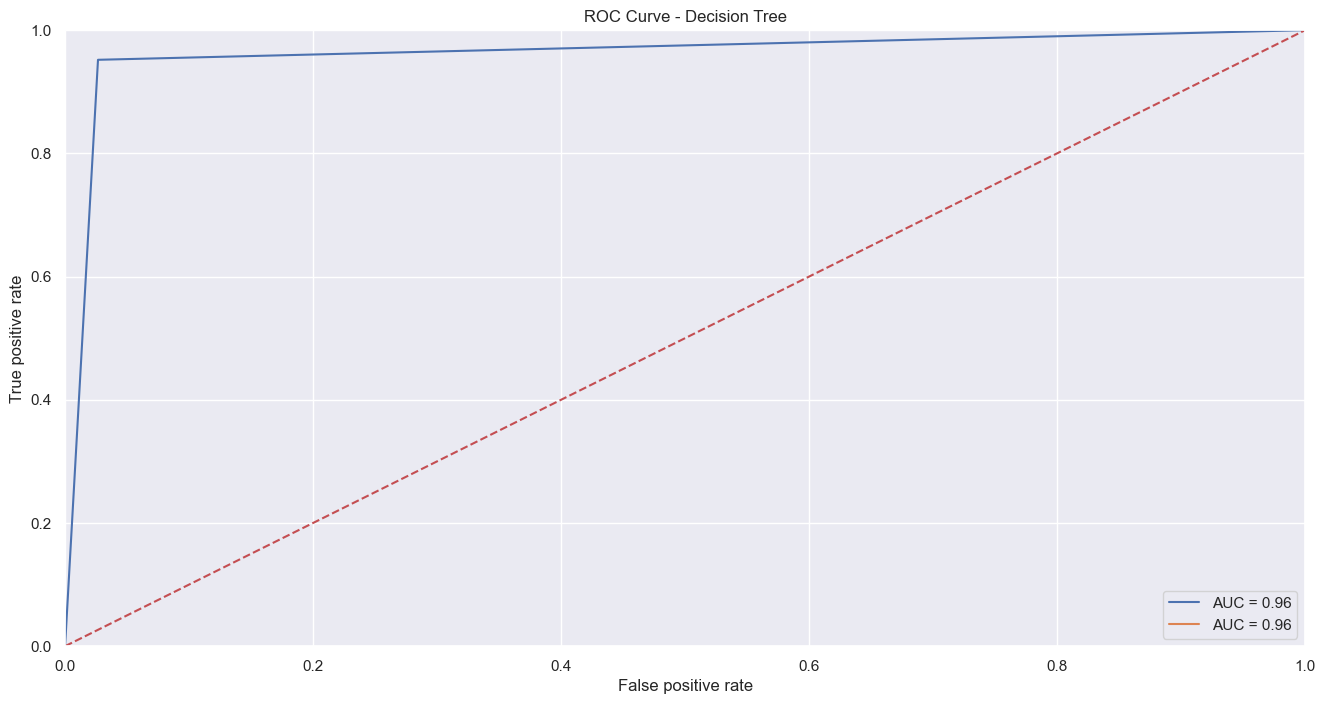

AUC - Decision Tree 0.9626775675244293


In [83]:
a1 = []
prediction_probability1 = decision_tree.predict_proba(X_test)
prediction1 = prediction_probability1[:,1]
false_positive_rate1,true_positive_rate1, threshold1 = roc_curve(Y_test, prediction1)
c_roc_auc1 = auc(false_positive_rate1,true_positive_rate1)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate1,true_positive_rate1,a1,label= 'AUC = %0.2f' % c_roc_auc1)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC Curve - Decision Tree')
plt.show()
a1.append(c_roc_auc1)
print("AUC - Decision Tree",roc_auc_score(Y_test,prediction1))

### ROC Curve - Random Forest

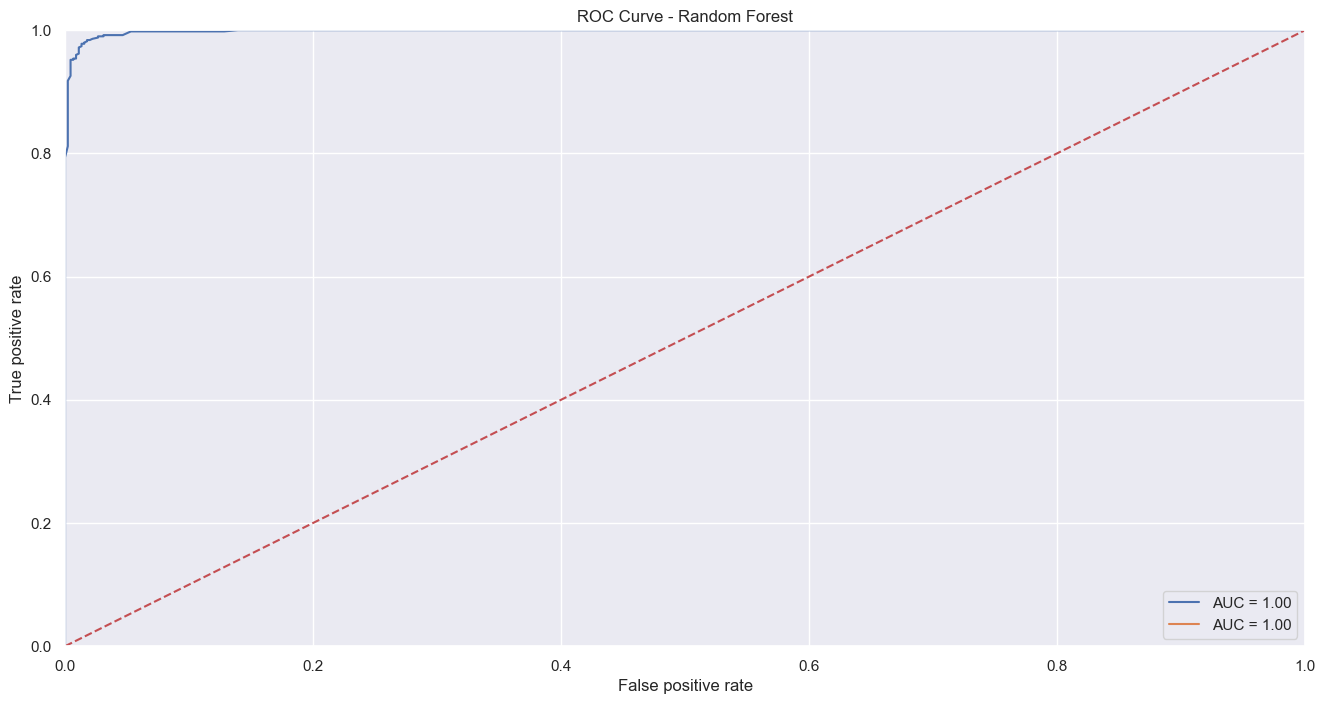

AUC - Random Forest 0.9984548743504709


In [84]:
prediction_probability2 = random_forest.predict_proba(X_test)
prediction2= prediction_probability2[:,1]
false_positive_rate2,true_positive_rate2, threshold2 = roc_curve(Y_test, prediction2)
c_roc_auc2 = auc(false_positive_rate2,true_positive_rate2)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate2,true_positive_rate2,a1,label= 'AUC = %0.2f' % c_roc_auc2)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC Curve - Random Forest')
plt.show()
a1.append(c_roc_auc2)
print("AUC - Random Forest",roc_auc_score(Y_test,prediction2))

### ROC Curve - SVM

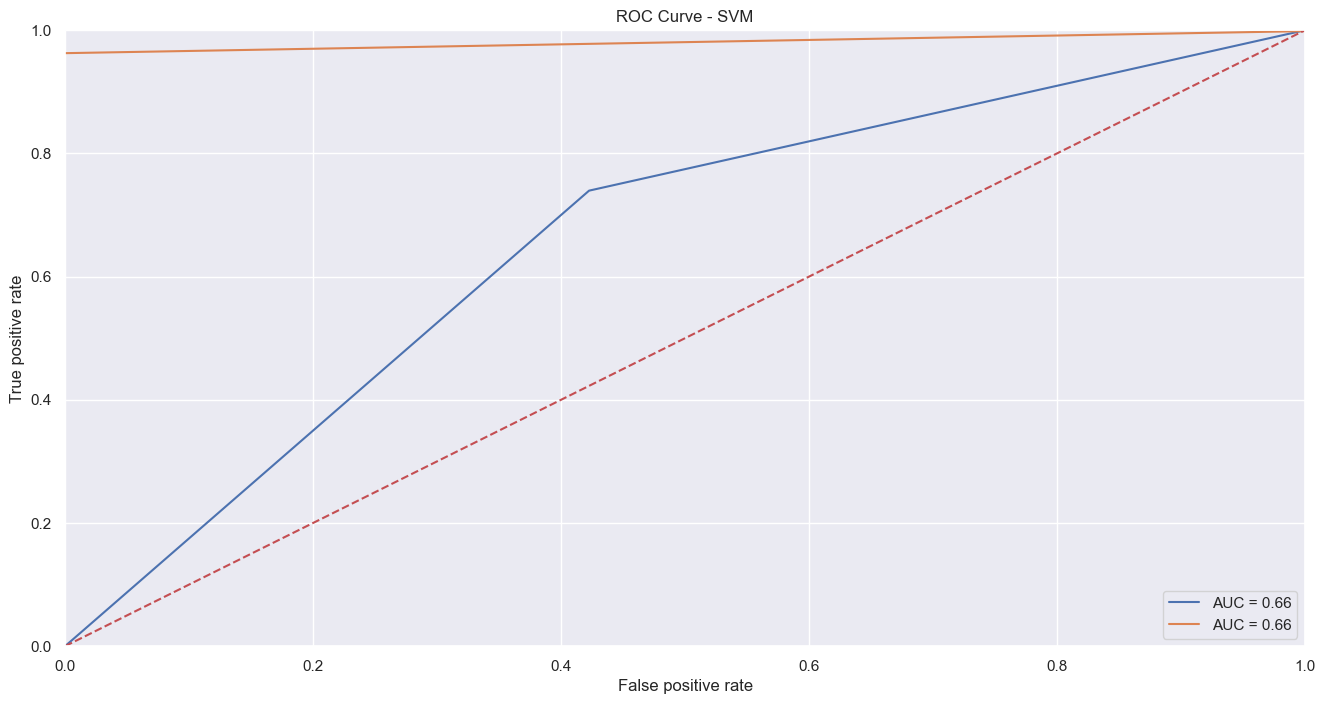

AUC - SVM 0.658456293117208


In [85]:
false_positive_rate3,true_positive_rate3, threshold3 = roc_curve(Y_test, pred3)
c_roc_auc3 = auc(false_positive_rate3,true_positive_rate3)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate3,true_positive_rate3,a1,label= 'AUC = %0.2f' % c_roc_auc3)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC Curve - SVM')
plt.show()
a1.append(c_roc_auc3)
print("AUC - SVM",roc_auc_score(Y_test,pred3))

### ROC Curve - Naive Bayes

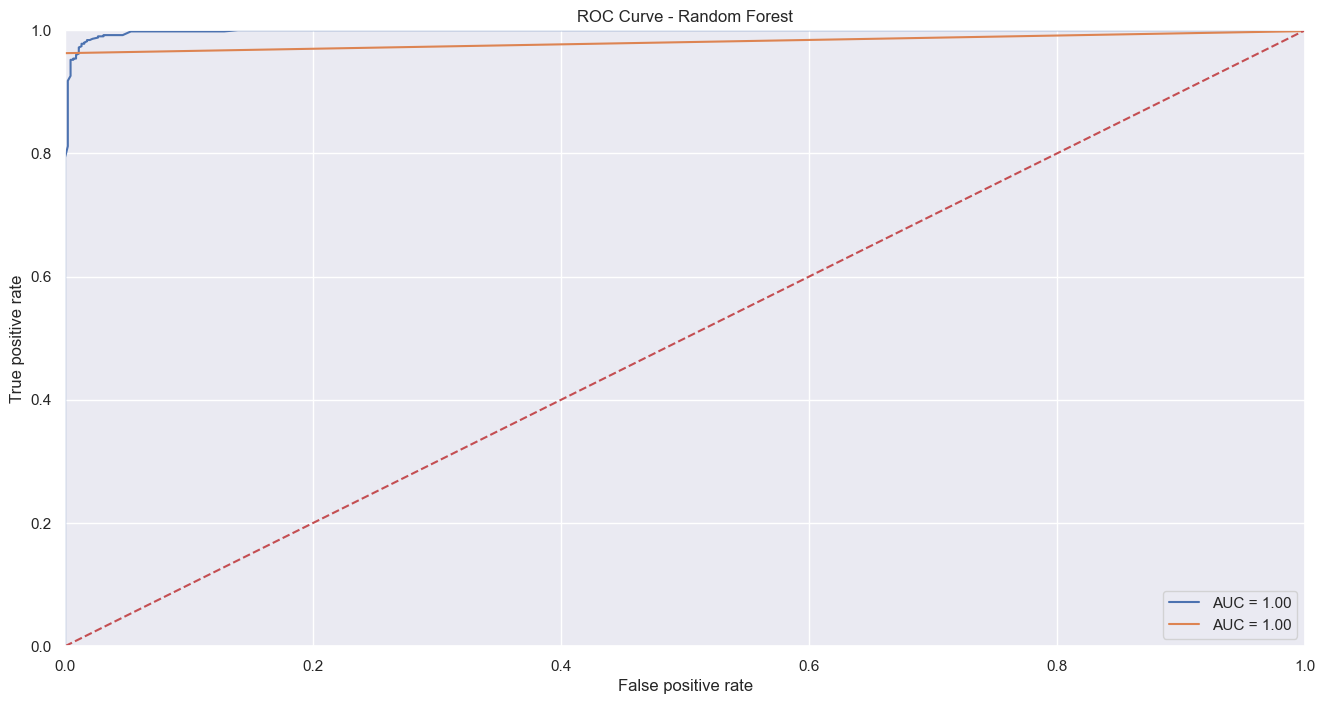

AUC - Random Forest 0.9984548743504709


In [86]:
prediction_probability3 = random_forest.predict_proba(X_test)
prediction3= prediction_probability3[:,1]
false_positive_rate4,true_positive_rate4, threshold4 = roc_curve(Y_test, prediction3)
c_roc_auc4 = auc(false_positive_rate4,true_positive_rate4)
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate4,true_positive_rate4,a1,label= 'AUC = %0.2f' % c_roc_auc4)
plt.legend(loc = 'lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')
plt.title('ROC Curve - Random Forest')
plt.show()
a1.append(c_roc_auc4)
print("AUC - Random Forest",roc_auc_score(Y_test,prediction3))

## Area Under Curve for all models 

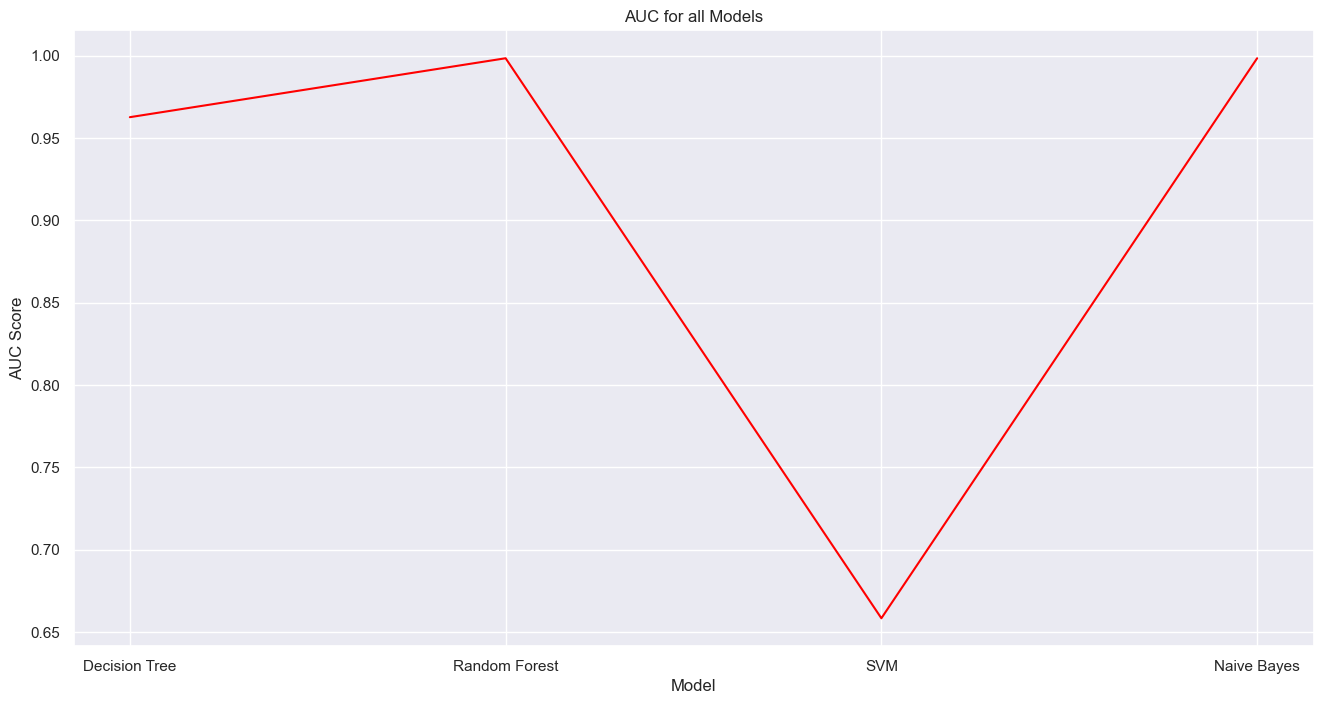

In [92]:
a2=["Decision Tree","Random Forest","SVM","Naive Bayes"]
plt.plot(a2,a1,color='red')
plt.title('AUC for all Models')
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.show()

### Conclusion

After analyzing the Precision, F1-score, Recall values, Prediction Pie Chart, Accuracy Score, Confusion Matrix, ROC Curve, and AUC Line Graph, we can conclude that for predicting the gender of a person based on their voice signals, random forest classification is the most appropriate method. On the other hand, Support Vector Machine is not recommended for this task based on the same analysis.